In [17]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix

In [2]:
pwd

'/Users/andrewstephens/Final_project/Modeling'

In [3]:
cd ..

/Users/andrewstephens/Final_project


In [4]:
df = pd.read_csv('Data/Preprocessing.csv',index_col=0)
df.head()

,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,nr.employed,y,job_admin.,job_blue-collar,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,1,999,0,93.994,-36.4,5191.0,no,0,0,...,0,1,0,0,0,0,1,0,1,0
1,57,1,999,0,93.994,-36.4,5191.0,no,0,0,...,0,1,0,0,0,0,1,0,1,0
2,37,1,999,0,93.994,-36.4,5191.0,no,0,0,...,0,1,0,0,0,0,1,0,1,0
3,40,1,999,0,93.994,-36.4,5191.0,no,1,0,...,0,1,0,0,0,0,1,0,1,0
4,56,1,999,0,93.994,-36.4,5191.0,no,0,0,...,0,1,0,0,0,0,1,0,1,0


In [5]:
X=df.drop(['y',"y_yes","y_no"], axis=1)
y=df['y']



# Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [7]:
X_train.shape, y_train.shape 

((28831, 60), (28831,))

# Model Creation

We will be starting with KNN, a unsupervised learning method, because its versatile, simple, accurate and non assumpitve. Choosing K parameter will be most important, as it may cause overfitting if we are not careful. 

In [8]:
# pipeline combining transformers and estimator
pipe_knn= make_pipeline(StandardScaler(), KNeighborsClassifier())

In [9]:
# grid searh to choose the best (combination of) hyperparameters
gs_knn=GridSearchCV(estimator= pipe_knn,
               param_grid={'kneighborsclassifier__n_neighbors':[4,5,6,7]},
               scoring='accuracy',
               cv=4)


In [10]:



# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_knn_scores = cross_val_score(gs_knn, X=X_train, y=y_train, cv=3,scoring='accuracy', n_jobs=-1)



In [11]:
# fit, and fit with best estimator
gs_knn.fit(X_train, y_train)
gs_knn_best=gs_knn.best_estimator_
gs_knn_best.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=6))])

In [12]:
print('Train Accuracy:   {0:.1f}%'.format(gs_knn.score(X_train, y_train)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_knn.score(X_test, y_test)*100))


Train Accuracy:   90.6%
Test Accuracy:    89.6%


In [13]:
#confusion_matrix and classification report
ypreds=gs_knn_best.predict(X_test)
print(confusion_matrix(ypreds ,y_test))
print(classification_report(ypreds ,y_test))



[[10804  1124]
 [  164   265]]
              precision    recall  f1-score   support

          no       0.99      0.91      0.94     11928
         yes       0.19      0.62      0.29       429

    accuracy                           0.90     12357
   macro avg       0.59      0.76      0.62     12357
weighted avg       0.96      0.90      0.92     12357



In [14]:
#confusion matrix 

Confusion matrix, without normalization
[[10804   164]
 [ 1124   265]]
Normalized confusion matrix
[[0.98504741 0.01495259]
 [0.80921526 0.19078474]]


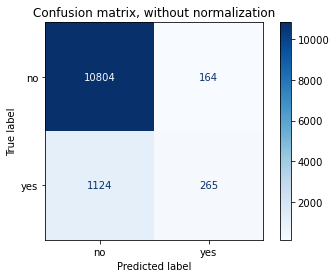

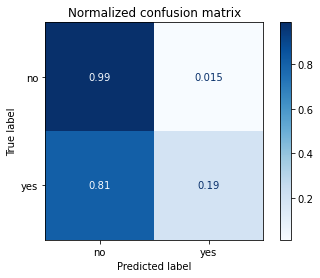

In [21]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gs_knn, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


using lower cv than i would like purely because i dont have enough computational power. I know the higher CV, i can reduce bias and raise variance. 

Looks really good ! Now lets try SVM 

# SVM 

A support vector machine is a machine learning model that is able to generalise between two different classes if the set of labelled data is provided in the training set to the algorithm. The main function of the SVM is to check for that hyperplane that is able to distinguish between the two classes.[1]

In [29]:
# pipeline combining transformers and estimator
pipe_svm= make_pipeline(StandardScaler(), SVC(random_state=1))

# grid searh to choose the best (combination of) hyperparameters
r=[0.1,1,10]
pg_svm=[ {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]

gs_svm=GridSearchCV(estimator= pipe_svm,
               param_grid= pg_svm,
               scoring='accuracy',
               cv=2)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_svm_scores = cross_val_score(gs_svm, X=X_train, y=y_train, cv=2,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_svm.fit(X_train, y_train)
gs_svm_best=gs_svm.best_estimator_
gs_svm_best.fit(X_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_svm.score(X_train, y_train)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_svm.score(X_test, y_test)*100))

Train Accuracy:   88.7%
Test Accuracy:    88.8%


In [30]:
#confusion_matrix and classification report
ypreds=gs_svm_best.predict(X_test)
print(confusion_matrix(ypreds ,y_test))
print(classification_report(ypreds ,y_test))



[[10968  1389]
 [    0     0]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          no       1.00      0.89      0.94     12357
         yes       0.00      0.00      0.00         0

    accuracy                           0.89     12357
   macro avg       0.50      0.44      0.47     12357
weighted avg       1.00      0.89      0.94     12357



Confusion matrix, without normalization
[[10968     0]
 [ 1389     0]]
Normalized confusion matrix
[[1. 0.]
 [1. 0.]]


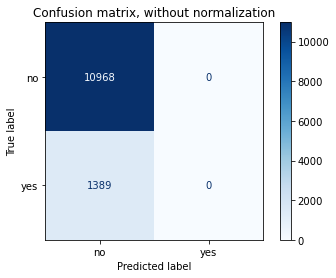

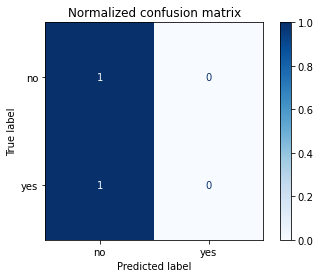

In [31]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gs_svm, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


# Random Forest

In [22]:
rf= RandomForestClassifier(random_state=1)

# grid searh to choose the best (combination of) hyperparameters
pg_rf={'n_estimators': [100,200,400],'max_depth': [20,40,50,60]}

gs_rf=GridSearchCV(estimator= rf,
               param_grid= pg_rf,
               scoring='accuracy',
               cv=2)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_rf_scores = cross_val_score(gs_rf, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_rf.fit(X_train, y_train)
gs_rf_best=gs_rf.best_estimator_
gs_rf_best.fit(X_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_rf.score(X_train, y_train)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_rf.score(X_test, y_test)*100))

Train Accuracy:   95.4%
Test Accuracy:    89.7%


In [23]:
#confusion_matrix and classification report
ypreds=gs_rf_best.predict(X_test)
print(confusion_matrix(ypreds ,y_test))
print(classification_report(ypreds ,y_test))



[[10714  1017]
 [  254   372]]
              precision    recall  f1-score   support

          no       0.98      0.91      0.94     11731
         yes       0.27      0.59      0.37       626

    accuracy                           0.90     12357
   macro avg       0.62      0.75      0.66     12357
weighted avg       0.94      0.90      0.91     12357



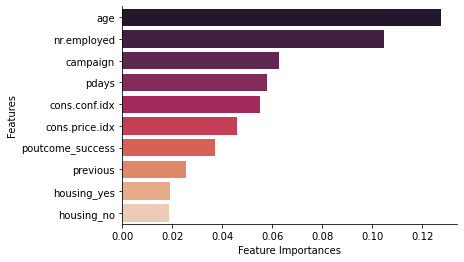

In [24]:
# using random forest to get feature importances
importances= gs_rf_best.feature_importances_
feature_importances= pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10], palette="rocket")
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

Confusion matrix, without normalization
[[10714   254]
 [ 1017   372]]
Normalized confusion matrix
[[0.97684172 0.02315828]
 [0.73218143 0.26781857]]


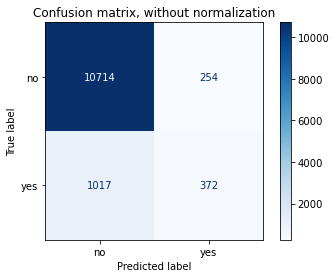

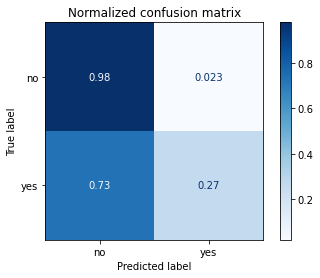

In [25]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gs_rf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


Age seems to be the biggest factor,but that is no surprise because the younger they can get a client, the longer they can do business with them over the course of their life.Volume is another factor, because we can see how important the number of employees to carry through the campaign is.That means to say that any decrease in the workforce would have negative effects to the marketing campaign. 

# Gradient Boosting 


In [26]:
# estimator
xb= xgb.XGBClassifier(random_state=1)

# grid searh to choose the best (combination of) hyperparameters
pg_xb={'n_estimators':[100,200,400], 'max_depth':[20,40,50]}

gs_xb=GridSearchCV(estimator= xb,
               param_grid= pg_xb,
               scoring='accuracy',
               cv=2)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_xb_scores = cross_val_score(gs_xb, X=X_train, y=y_train, cv=3,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_xb.fit(X_train, y_train)
gs_xb_best=gs_xb.best_estimator_
gs_xb_best.fit(X_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_xb.score(X_train, y_train)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_xb.score(X_test, y_test)*100))


Train Accuracy:   99.4%
Test Accuracy:    88.3%


In [27]:
# using random forest results: confusion_matrix and classification report
ypreds=gs_xb_best.predict(X_test)
print(confusion_matrix(ypreds ,y_test))
print(classification_report(ypreds ,y_test))


[[10494   976]
 [  474   413]]
              precision    recall  f1-score   support

          no       0.96      0.91      0.94     11470
         yes       0.30      0.47      0.36       887

    accuracy                           0.88     12357
   macro avg       0.63      0.69      0.65     12357
weighted avg       0.91      0.88      0.89     12357



Confusion matrix, without normalization
[[10494   474]
 [  976   413]]
Normalized confusion matrix
[[0.95678337 0.04321663]
 [0.70266379 0.29733621]]


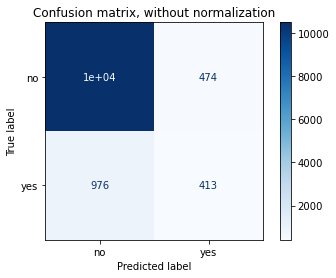

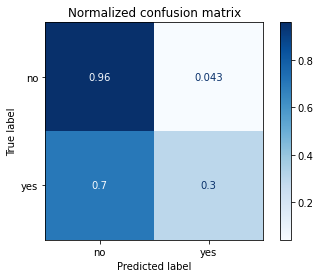

In [28]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(gs_xb, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

Reference #1  https://www.analyticssteps.com/blogs/how-does-support-vector-machine-algorithm-works-machine-learning 